# Exploratory Data Analysis of ATLAS RPV and QCD Data

In this notebook, we use the pre-processed numpy data files for some exploratory work.
The files were produced from the Delphes ROOT files using the prepare_data.py script.
We will look at some summary information in these files and make some general physics plots.

In [1]:
# System imports
from __future__ import print_function
import os

# External imports
import numpy as np
import matplotlib.pyplot as plt

# Magic
%matplotlib notebook

## Prepare the data

Let's specify which data files we'll use and prepare some helper code for reading that data.

In [2]:
input_dir = os.path.join(os.getenv('SCRATCH'), 'atlasdl', 'prod004')

In [3]:
ls $input_dir

qcd_JZ10.npz  qcd_JZ3.npz  qcd_JZ6.npz  qcd_JZ9.npz
qcd_JZ11.npz  qcd_JZ4.npz  qcd_JZ7.npz  rpv_1400_850.npz
qcd_JZ12.npz  qcd_JZ5.npz  qcd_JZ8.npz


In [4]:
samples = ['qcd_JZ3', 'qcd_JZ4', 'qcd_JZ5', 'qcd_JZ6', 'qcd_JZ7',
           'qcd_JZ8', 'qcd_JZ9', 'qcd_JZ10', 'qcd_JZ11', 'qcd_JZ12',
           'rpv_1400_850']
sample_files = map(lambda s: os.path.join(input_dir, s + '.npz'), samples)

In [5]:
sample_files

['/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ3.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ4.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ5.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ6.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ7.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ8.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ9.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ10.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ11.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ12.npz',
 '/global/cscratch1/sd/sfarrell/atlasdl/prod004/rpv_1400_850.npz']

In [6]:
def get_file_keys(file_name):
    """Retrieves the list of keys from an npz file"""
    with np.load(file_name) as f:
        keys = f.keys()
    return keys

def retrieve_data(file_name, *keys):
    """
    A helper function for retrieving some specified arrays from one npz file.
    Returns a list of arrays corresponding to the requested key name list.
    """
    with np.load(file_name) as f:
        try:
            data = [f[key] for key in keys]
        except KeyError as err:
            print('Requested key not found. Available keys:', f.keys())
            raise
    return data

## Data summary

Let's print out some basic information about the samples

In [7]:
def print_file_summary(file_name):
    print('File summary for', file_name)
    print('  Keys:', get_file_keys(file_name))
    totalEvents, skimEvents, passSR4J, passSR5J, xsec = retrieve_data(
        file_name, 'totalEvents', 'skimEvents', 'passSR4J', 'passSR5J', 'xsec')
    print('  Total events:', totalEvents.sum())
    print('  Skim events:', skimEvents.sum())
    print('  SR4J events:', passSR4J.sum())
    print('  SR5J events:', passSR5J.sum())
    print('  Cross sections:', np.unique(xsec))

In [8]:
for sample_file in sample_files:
    print_file_summary(sample_file)

File summary for /global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ3.npz
  Keys: ['clusEta', 'skimEvents', 'clusPhi', 'trackPhi', 'eventNumber', 'proc', 'passSR', 'fatJetPt', 'fatJetEta', 'passSR5J', 'passSR4J', 'fatJetPhi', 'trackPt', 'clusE', 'inputFile', 'totalEvents', 'sumFatJetM', 'xsec', 'fatJetM', 'clusEM', 'trackEta']
  Total events: 3200000
  Skim events: 2044
  SR4J events: 0
  SR5J events: 0
  Cross sections: [ 164300.]
File summary for /global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ4.npz
  Keys: ['clusEta', 'skimEvents', 'clusPhi', 'trackPhi', 'eventNumber', 'proc', 'passSR', 'fatJetPt', 'fatJetEta', 'passSR5J', 'passSR4J', 'fatJetPhi', 'trackPt', 'clusE', 'inputFile', 'totalEvents', 'sumFatJetM', 'xsec', 'fatJetM', 'clusEM', 'trackEta']
  Total events: 3200000
  Skim events: 235392
  SR4J events: 29
  SR5J events: 23
  Cross sections: [ 1997.]
File summary for /global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ5.npz
  Keys: ['clusEta', 'skimEvents', 'clusPhi', 'tra

## Plotting and analysis utilities

Helper code for analyzing and plotting the data.

## Plot unweighted distributions

Let's make some basic plots of the samples, ignoring sample weights.

Here are some examples of using np.histogram with pyplot:
http://stackoverflow.com/questions/5328556/histogram-matplotlib

In [25]:
num_bins = 50
bin_range = (200, 5000)
jetPtHists = []
for sample_file in sample_files:
    print(sample_file)
    jetPt, = retrieve_data(sample_file, 'fatJetPt')
    jetPtFlat = np.concatenate(jetPt)
    hist, bins = np.histogram(jetPtFlat, bins=num_bins, range=bin_range, normed=True)
    jetPtHists.append(hist)
    jetPtBins = bins

/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ3.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ4.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ5.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ6.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ7.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ8.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ9.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ10.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ11.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/qcd_JZ12.npz
/global/cscratch1/sd/sfarrell/atlasdl/prod004/rpv_1400_850.npz


<IPython.core.display.Javascript object>


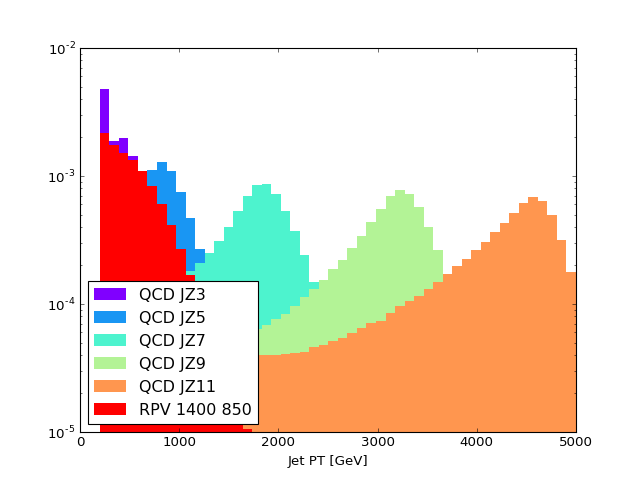

In [26]:
sample_colors = plt.cm.rainbow(np.linspace(0,1,len(samples)))
plt.figure()
for hist, sample, color in zip(jetPtHists, samples, sample_colors)[::2]:
    label = sample.upper().replace('_', ' ')
    plt.bar(jetPtBins[:-1], hist, width=np.diff(jetPtBins),
            label=label, color=color, linewidth=0, alpha=1, log=True)
plt.xlabel('Jet PT [GeV]')
plt.ylim(ymin=1e-5)
plt.legend(loc=3)

<IPython.core.display.Javascript object>


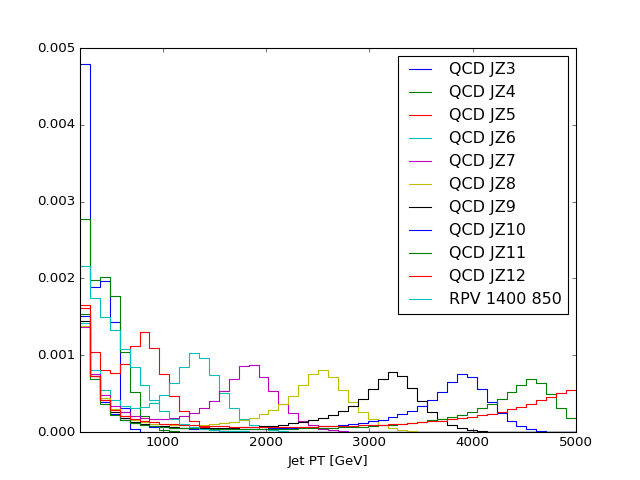

In [29]:
plt.figure()
for hist, sample in zip(jetPtHists, samples):
    label = sample.upper().replace('_', ' ')
    X = np.array([jetPtBins[:-1], jetPtBins[1:]]).T.flatten()
    Y = np.array([hist, hist]).T.flatten()
    plt.plot(X, Y, label=label)
    pass
plt.xlim(xmin=200)
plt.xlabel('Jet PT [GeV]')
plt.legend(loc=0)